In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


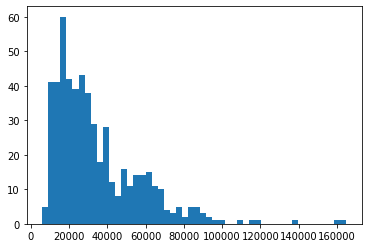

In [38]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.std(audi_a3_2000ccm["Price"])
plt.figure()
plt.hist(audi_a3_2000ccm["Price"], bins = 50)
plt.show()

In [39]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_1_ppc.stan to exe file /home/DA/project/car_price_1_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_1_ppc


In [40]:
R = 2000
N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data = data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)





chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [41]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[100]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-589.206,0.666667,0.228429,1.0,3.0,1.0,592.464,1.853630e+292,-0.447837,29.3632,...,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292,1.853630e+292
1,-587.373,0.996954,0.228429,3.0,7.0,0.0,589.995,2.663460e+293,-0.483829,26.5520,...,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293,2.663460e+293
2,-587.748,0.832719,0.228429,2.0,6.0,1.0,589.024,3.447420e+282,-0.434630,25.7876,...,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282,3.447420e+282
3,-587.798,0.998337,0.228429,4.0,15.0,0.0,588.414,3.348640e+284,-0.355913,23.8388,...,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284,3.348640e+284
4,-586.543,0.888723,0.228429,3.0,9.0,1.0,588.475,9.601810e+299,-0.364536,23.8355,...,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299,9.601810e+299


/usr/local/lib/python3.9/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/usr/local/lib/python3.9/site-packages/numpy/lib/histograms.py:851: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 21

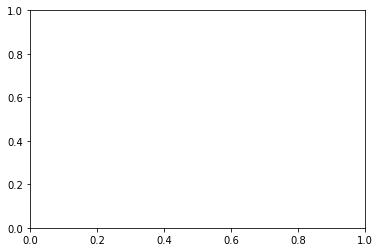

In [42]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [8]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▎         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)






chain 1 |█▌        | 00:05 Iteration:  300 / 3000 [ 10%]  (Warmup)


chain 1 |█▉        | 00:07 Iteration:  400 / 3000 [ 13%]  (Warmup)



chain 1 |██▏       | 00:08 Iteration:  500 / 3000 [ 16%]  (Warmup)








chain 1 |██▌       | 00:09 Iteration:  600 / 3000 [ 20%]  (Warmup)




chain 1 |██▊       | 00:11 Iteration:  700 / 3000 [ 23%]  (Warmup)



chain 1 |████      | 00:13 Iteration: 1001 / 3000 [ 33%]  (Sampling)


chain 1 |████▋     | 00:14 Iteration: 1200 / 3000 [ 40%]  (Sampling)

chain 1 |█████▎    | 00:14 Iteration: 1400 / 3000 [ 46%]  (Sampling)

chain 1 |█████▋    | 00:15 Iteration: 1500 / 3000 [ 50%]  (Sampling)
chain 1 |█████▉    | 00:15 Iteration: 1600 / 3000 [ 53%]  (Sampling)

chain 1 |██████▌   | 00:16 Iteration: 1800 / 3000 [ 60%] 


INFO:cmdstanpy:CmdStan done processing.


In [9]:
fit_pd = fit.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-530330.0,0.839974,0.072605,2.0,3.0,0.0,530383.0,-91174.5,-0.269363,90.0536,...,35796.3,58317.1,57232.1,40780.9,48792.4,20287.3,48384.2,83896.0,42935.7,50362.6
1,-530316.0,0.846484,0.072605,3.0,7.0,0.0,530333.0,-91289.8,-0.269482,90.1123,...,36833.5,57225.1,56433.3,40289.3,48465.3,25038.5,44063.9,78308.0,44355.5,52196.1
2,-530211.0,0.991041,0.072605,3.0,7.0,0.0,530318.0,-92043.5,-0.270127,90.6329,...,36277.4,56264.3,57228.0,39218.0,50036.3,25459.1,49661.7,76795.8,43054.2,52754.7
3,-530204.0,0.993022,0.072605,3.0,7.0,0.0,530215.0,-92097.6,-0.270252,90.6692,...,36105.9,56929.9,58881.3,39836.2,48313.8,23034.6,48074.2,79745.1,40126.5,46681.2
4,-530185.0,0.989248,0.072605,2.0,3.0,0.0,530205.0,-92285.5,-0.270243,90.7207,...,35658.5,54871.9,56766.8,42127.2,53359.7,26804.9,49888.1,82667.8,38359.6,53653.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-523560.0,0.999899,0.010015,7.0,127.0,0.0,523562.0,-203059.0,-0.278312,146.8420,...,35744.0,60954.0,57938.5,42631.1,48001.3,23270.1,50371.3,86983.5,46730.0,52618.9
7996,-523558.0,0.989420,0.010015,7.0,127.0,0.0,523561.0,-203358.0,-0.279148,147.0430,...,35669.4,59702.4,60752.4,40465.8,49695.7,22832.7,51218.2,76834.0,42217.0,51015.5
7997,-523558.0,0.985876,0.010015,7.0,159.0,0.0,523559.0,-203894.0,-0.279126,147.3180,...,33736.7,60171.6,55862.5,38310.4,48898.6,24888.8,47081.9,76704.7,41095.1,50796.5
7998,-523559.0,0.999175,0.010015,6.0,127.0,0.0,523561.0,-203078.0,-0.278468,146.8590,...,37849.7,60179.4,58172.0,39078.3,50496.8,24924.5,51833.0,80723.1,43116.1,55942.8


In [10]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

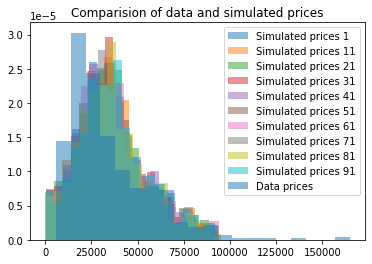

In [11]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()